<a href="https://colab.research.google.com/github/SumiranD/AI_Lab_Agents/blob/main/knn_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

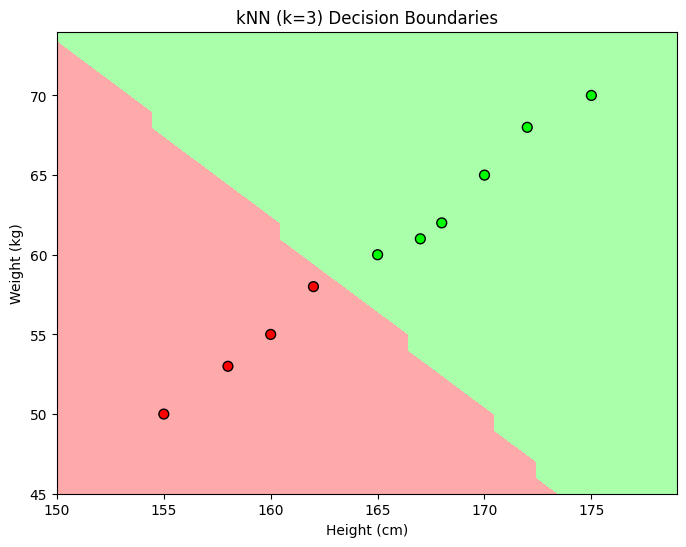

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from collections import Counter

# Dataset
data = np.array([
    [165, 60, 1],
    [170, 65, 1],
    [160, 55, 0],
    [175, 70, 1],
    [155, 50, 0],
    [168, 62, 1],
    [162, 58, 0],
    [172, 68, 1],
    [158, 53, 0],
    [167, 61, 1]
])

X = data[:, :2]
y = data[:, 2]

def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def knn_predict(X_train, y_train, x_test, k):
    distances = [euclidean_distance(x_test, x_train) for x_train in X_train]
    k_indices = np.argsort(distances)[:k]
    k_nearest_labels = [y_train[i] for i in k_indices]
    most_common = Counter(k_nearest_labels).most_common(1)
    return most_common[0][0]

# Grid for decision boundaries
h = 1
x_min, x_max = X[:, 0].min() - 5, X[:, 0].max() + 5
y_min, y_max = X[:, 1].min() - 5, X[:, 1].max() + 5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict each point in the mesh
Z = np.array([knn_predict(X, y, np.array([x, y_]), k=3) for x, y_ in zip(xx.ravel(), yy.ravel())])
Z = Z.reshape(xx.shape)

# Plotting
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=50)
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.title("kNN (k=3) Decision Boundaries")
plt.show()